# Final Project - Data Analysis and Classification
#### Riccardo Biella

Import of libraries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
import networkx as nx
import community

Load the datasets

In [39]:
db_artists = pd.read_csv("datasets/artists.csv",error_bad_lines=False, sep = '\t')
db_user_artists = pd.read_csv("datasets/user_artists.csv",error_bad_lines=False, sep = '\t')
db_user_friends = pd.read_csv("datasets/user_friends.csv",error_bad_lines=False, sep = '\t')
db_tags = pd.read_csv("datasets/tags.csv",error_bad_lines=False, sep = '\t')
db_test_user_artists = pd.read_csv("datasets/test_user_artists.csv",error_bad_lines=False, sep = '\t')
db_user_taggedartists = pd.read_csv("datasets/user_taggedartists.csv",error_bad_lines=False, sep = '\t')
db_user_taggedartists_timestamps = pd.read_csv("datasets/user_taggedartists_timestamps.csv",error_bad_lines=False, sep = '\t')

## Task1: EDA
Explore the dataset (shape of each file, data types, values distribution, ...).

##### EDA on artists dataset

In [3]:
db_artists.head(10)

,id,name
0,1,MALICE MIZER
1,2,Diary of Dreams
2,3,Carpathian Forest
3,4,Moi dix Mois
4,5,Bella Morte
5,6,Moonspell
6,7,Marilyn Manson
7,8,DIR EN GREY
8,9,Combichrist
9,10,Grendel


In [4]:
db_artists.shape

(17632, 2)

In [5]:
db_artists.dtypes

id       int64
name    object
dtype: object

In [6]:
db_artists.describe(include='all') #includes also the cathegorical values

,id,name
count,17632.000000,17632
unique,NaN,17632
top,NaN,{{{Sunset}}}
freq,NaN,1
mean,9156.636853,NaN
std,5392.515296,NaN
min,1.000000,NaN
25%,4501.750000,NaN
50%,9048.500000,NaN
75%,13769.250000,NaN


##### EDA on user_artists dataset

In [7]:
db_user_artists.head(10)

,userID,artistID,weight
0,1430,1097,108
1,822,267,2157
2,1335,13910,59
3,815,325,2977
4,1147,12657,142
5,2093,2893,153
6,656,5156,22
7,80,2215,3
8,1273,441,129
9,1340,2637,502


In [8]:
db_user_artists.shape

(83491, 3)

In [9]:
db_user_artists.dtypes

userID      int64
artistID    int64
weight      int64
dtype: object

In [10]:
db_user_artists.describe(include='all') #includes also the cathegorical values

,userID,artistID,weight
count,83491.000000,83491.00000,83491.000000
mean,1036.348133,3329.55055,743.107173
std,610.703821,4381.56117,3773.524885
min,2.000000,1.00000,1.000000
25%,501.500000,436.00000,107.000000
50%,1027.000000,1246.00000,260.000000
75%,1568.000000,4351.50000,614.000000
max,2100.000000,18745.00000,352698.000000


##### EDA on user_friends dataset

In [11]:
db_user_friends.head(10)

,userID,friendID
0,2,275
1,2,428
2,2,515
3,2,761
4,2,831
5,2,909
6,2,1209
7,2,1210
8,2,1230
9,2,1327


In [12]:
db_user_friends.shape

(25434, 2)

In [13]:
db_user_friends.dtypes

userID      int64
friendID    int64
dtype: object

In [14]:
db_user_friends.describe(include='all') #includes also the cathegorical values

,userID,friendID
count,25434.000000,25434.000000
mean,992.161437,992.161437
std,603.959049,603.959049
min,2.000000,2.000000
25%,441.000000,441.000000
50%,984.000000,984.000000
75%,1514.000000,1514.000000
max,2100.000000,2100.000000


##### EDA on tags dataset

In [15]:
db_tags.head(10)

,tagID,tagValue
0,1,metal
1,2,alternative metal
2,3,goth rock
3,4,black metal
4,5,death metal
5,6,industrial metal
6,7,gothic metal
7,8,terror ebm
8,9,electro-industrial
9,10,harsh ebm


In [16]:
db_tags.shape

(11946, 2)

In [17]:
db_tags.dtypes

tagID        int64
tagValue    object
dtype: object

In [18]:
db_tags.describe(include='all') #includes also the cathegorical values

,tagID,tagValue
count,11946.000000,11946
unique,NaN,11946
top,NaN,true blood
freq,NaN,1
mean,6242.315336,NaN
std,3667.498057,NaN
min,1.000000,NaN
25%,3036.250000,NaN
50%,6210.500000,NaN
75%,9460.750000,NaN


##### EDA on test_user_artists dataset

In [19]:
db_test_user_artists.head(10)

,userID,artistID
0,186,704
1,1833,10600
2,1620,3817
3,1535,7777
4,1493,7120
5,1115,14852
6,1217,5437
7,1153,18707
8,584,5052
9,2014,601


In [20]:
db_test_user_artists.shape

(19245, 2)

In [21]:
db_test_user_artists.dtypes

userID      int64
artistID    int64
dtype: object

In [22]:
db_test_user_artists.describe(include='all') #includes also the cathegorical values

,userID,artistID
count,19245.000000,19245.000000
mean,1038.011587,5957.216368
std,610.314875,5569.652843
min,2.000000,1.000000
25%,506.000000,989.000000
50%,1037.000000,4052.000000
75%,1566.000000,10156.000000
max,2100.000000,18744.000000


##### EDA on user_taggedartists dataset

In [23]:
db_user_taggedartists.head(10)

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
4,2,52,41,1,4,2009
5,2,63,13,1,4,2009
6,2,63,14,1,4,2009
7,2,63,23,1,4,2009
8,2,63,40,1,4,2009
9,2,73,13,1,4,2009


In [24]:
db_user_taggedartists.shape

(186479, 6)

In [25]:
db_user_taggedartists.dtypes

userID      int64
artistID    int64
tagID       int64
day         int64
month       int64
year        int64
dtype: object

In [26]:
db_user_taggedartists.describe(include='all') #includes also the cathegorical values

,userID,artistID,tagID,day,month,year
count,186479.000000,186479.000000,186479.000000,186479.000000,186479.000000,186479.000000
mean,1035.600137,4375.845328,1439.582913,1.095566,6.524215,2008.809791
std,622.461272,4897.789595,2775.340279,0.712813,3.486855,1.410062
min,2.000000,1.000000,1.000000,1.000000,1.000000,1956.000000
25%,488.000000,686.000000,79.000000,1.000000,3.000000,2008.000000
50%,1021.000000,2203.000000,195.000000,1.000000,7.000000,2009.000000
75%,1624.000000,6714.000000,887.000000,1.000000,10.000000,2010.000000
max,2100.000000,18744.000000,12647.000000,9.000000,12.000000,2011.000000


##### EDA on user_taggedartists_timestamps dataset

In [27]:
db_user_taggedartists_timestamps.head(10)

,userID,artistID,tagID,timestamp
0,2,52,13,1238536800000
1,2,52,15,1238536800000
2,2,52,18,1238536800000
3,2,52,21,1238536800000
4,2,52,41,1238536800000
5,2,63,13,1238536800000
6,2,63,14,1238536800000
7,2,63,23,1238536800000
8,2,63,40,1238536800000
9,2,73,13,1238536800000


In [28]:
db_user_taggedartists_timestamps.shape

(186479, 4)

In [29]:
db_user_taggedartists_timestamps.dtypes

userID       int64
artistID     int64
tagID        int64
timestamp    int64
dtype: object

In [30]:
db_user_taggedartists_timestamps.describe(include='all') #includes also the cathegorical values

,userID,artistID,tagID,timestamp
count,186479.000000,186479.000000,186479.000000,1.864790e+05
mean,1035.600137,4375.845328,1439.582913,1.239204e+12
std,622.461272,4897.789595,2775.340279,4.299091e+10
min,2.000000,1.000000,1.000000,-4.287204e+11
25%,488.000000,686.000000,79.000000,1.209593e+12
50%,1021.000000,2203.000000,195.000000,1.243807e+12
75%,1624.000000,6714.000000,887.000000,1.275343e+12
max,2100.000000,18744.000000,12647.000000,1.304941e+12


#### 1. Calculate the number of users and artists present in the network. 

In [31]:
print("Number of artists: ", db_artists.shape[0])
print("Number of users: ", len(db_user_artists["userID"].unique()))

Number of artists:  17632
Number of users:  1892


#### 2. Calculate the number of bi-directional user-friend relations pairs. 

In [56]:
bidirectionalFriends = 0
for userRelation in db_user_friends.values:
    friendRelations = db_user_friends.loc[db_user_friends['userID'] == userRelation[1]]
    for friendRelation in friendRelations.values:
        if userRelation[0] == friendRelation[1] and userRelation[1] == friendRelation[0]:
            bidirectionalFriends = bidirectionalFriends + 1
print("Number of bi-directional user-friend relations pairs: ", bidirectionalFriends)

Number of bi-directional user-friend relations pairs:  25434


#### 3. Calculate the average friend relations per user. 

In [74]:
usersRelationsGrouped = db_user_friends.groupby("userID")["friendID"].count()
print("The average friend relations per user is: ", np.mean(usersRelationsGrouped))

The average friend relations per user is:  13.44291754756871


#### 4. Calculate the number of user-listened artists relations (couples user-artist). 

In [85]:
print("Number of user-listened artists relations:")
userListenedArtists = db_user_artists.groupby("userID")["artistID"].count()
userListenedArtists

Number of user-listened artists relations:


userID
2       44
3       48
4       46
5       46
6       46
        ..
2095    41
2096    42
2097    46
2099    43
2100    44
Name: artistID, Length: 1892, dtype: int64

#### 5. Plot the distribution of the number of artists listened by each user, and calculate the average and mode of the distribution.

Average : 44.1284355179704
Mode of the distribution : [45]


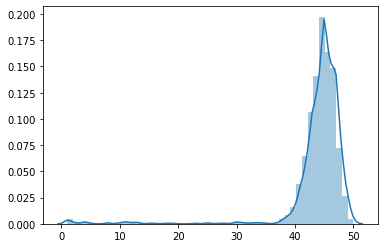

In [92]:
sns.distplot(userListenedArtists.values)
print("Average :", np.mean(userListenedArtists.values))
print("Mode of the distribution :",stats.mode(userListenedArtists.values)[0])

#### 6. Plot the distribution of the number of tag assignments per each artist, and calculate the average and mode of the distribution.

Average : 14.890920705901141
Mode of the distribution : [1]


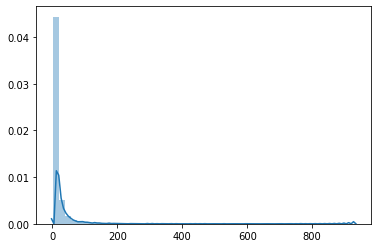

In [97]:
artistsTags = db_user_taggedartists_timestamps.groupby("artistID")["tagID"].count()

sns.distplot(artistsTags.values)
print("Average :", np.mean(artistsTags.values))
print("Mode of the distribution :",stats.mode(artistsTags.values)[0])

#### 7. Plot the distribution of the number of tag assignments per each user, and calculate the average and mode of the distribution.

Average : 98.56183932346723
Mode of the distribution : [3]


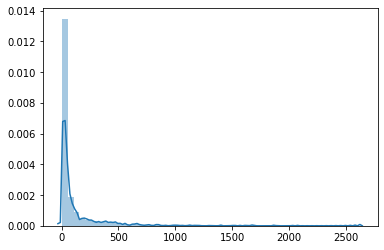

In [100]:
usersTags = db_user_taggedartists_timestamps.groupby("userID")["tagID"].count()

sns.distplot(usersTags.values)
print("Average :", np.mean(usersTags.values))
print("Mode of the distribution :",stats.mode(usersTags.values)[0])

#### 8. Plot the distribution of the number of distinct tag assignments per each artist, and calculate the average and mode of the distribution.

Average : 8.763874470973409
Mode of the distribution : [1]


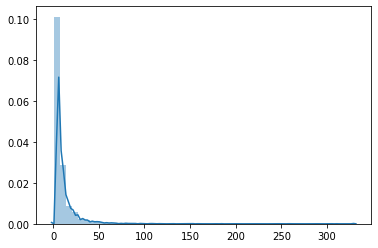

In [115]:
artistsUniqueTags = db_user_taggedartists_timestamps.groupby("artistID")["tagID"].unique().apply(lambda x: len(x))
sns.distplot(artistsUniqueTags.values)
print("Average :", np.mean(artistsUniqueTags.values))
print("Mode of the distribution :",stats.mode(artistsUniqueTags.values)[0])

## Task2: Clustering tags

In [36]:
print(data5)
filtered = data5.groupby("tagID").filter(lambda x: x['tagID'].count() > 3)
filtered

NameError: name 'data5' is not defined

In [ ]:
adjacency_matrix = pd.crosstab(filtered['tagID'], filtered['artistID']).apply(lambda r: r/r.max(), axis=1)
adjacency_matrix

In [ ]:
#similarity matrix
similarity_matrix = np.zeros((len(adjacency_matrix),len(adjacency_matrix)))
for i in range(len(adjacency_matrix)):
    for j in range(len(adjacency_matrix)):
        similarity_matrix[i][j] = np.sum(np.multiply(adjacency_matrix.values[i,:], adjacency_matrix.values[j,:]));
similarity_matrix      

In [ ]:
from scipy.spatial.distance import cdist
#cdist computes the ecuclidean distance between each pair of points in input

X = pd.DataFrame(similarity_matrix)
distortions = []
K = range(1,20)
for k in K:
    print(k)
    kmeanModel = KMeans(n_clusters=k).fit(X)
    # minimum distance between each point and its cluster center
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    #inertia (WSS) =Sum of squared distances of samples to their closest cluster center
    #distortions.append(kmeanModel.inertia_)

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeanModel = KMeans(n_clusters=15).fit(X)

In [ ]:
tags = pd.read_csv("dataset/tags.csv",error_bad_lines=False, sep = '\t')
print(X.loc[kmeanModel.labels_==0])
for i in range(500):
    print(tags.values[i])



In [ ]:
print("Cluster labels: {}".format(np.unique(kmeanModel.labels_)))

In [ ]:
cluster0=X.loc[kmeanModel.labels_==0]
cluster1=X.loc[kmeanModel.labels_==1]
cluster2=X.loc[kmeanModel.labels_==2]


centroids = kmeanModel.cluster_centers_
print(cluster1)

In [ ]:
plt.scatter(cluster0[0], cluster0[1] , c='blue')
#plt.scatter(cluster1['0'], cluster1['1'] , c='red')
plt.scatter(centroids[:,0], centroids[:,1], marker='x', color='black')

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeanModel.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Task3: Social network analysis 
#### 1. Compute the network properties: degree distribution, density, diameter. 

Number of nodes in the graph:  1892
Number of edges in the graph:  12717


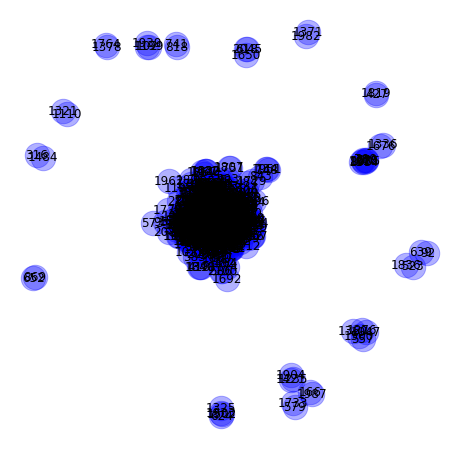

In [40]:
G_friends = nx.Graph()
G_friends.add_edges_from(db_user_friends.values)

print("Number of nodes in the graph: ", len(G_friends.nodes()))
print("Number of edges in the graph: ", len(G_friends.edges()))

pos = nx.spring_layout(G_friends)
plt.figure(figsize=(8, 8))
plt.axis("off")
nx.draw_networkx_nodes(G_friends, pos, node_size=600, node_color="blue", alpha=0.3)
nx.draw_networkx_edges(G_friends, pos, alpha=0.3)
nx.draw_networkx_labels(G_friends, pos)
plt.show(G_friends)


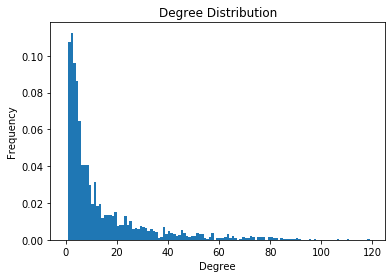

In [12]:
degree_dict=dict(nx.degree(G_friends))

degree_sequence=list(degree_dict.values())
degree_sequence=sorted(degree_sequence)
weights=np.ones_like(degree_sequence)/float(len(degree_sequence))

plt.hist(degree_sequence, bins=np.arange(np.max(degree_sequence)+1),weights=weights)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [42]:
# identify largest connected component
Gcc = sorted(nx.connected_components(G_friends), key=len, reverse=True)
G_largestConnectedComponent = G_friends.subgraph(Gcc[0])

print("diameter: %d" % nx.diameter(G_largestConnectedComponent))
    
print("density of subgraph: %s" % nx.density(G_friends))


diameter: 9
density of subgraph: 0.007108893467778271


#### 2. Compute the centrality measures, select the one that you consider more representative and justify your choice.

In [63]:
degree_centr = nx.degree_centrality(G_friends)
degree_centr_sorted = sorted(((v,k) for k,v in degree_centr.items()), reverse=True)
print("Central node according to degree centrality is: ", degree_centr_sorted[0][1])

Central node according to degree centrality is:  1543


In [11]:
eig_centr = nx.eigenvector_centrality(G_friends)
eig_centr_sorted  = sorted(((v,k) for k,v in eig_centr.items()), reverse=True)
print("Central node according to eigenvector centrality is: ", eig_centr_sorted[0][1])

Central node according to eigenvector centrality is:  1300


In [64]:
betw_centr = nx.betweenness_centrality(G_friends)
betw_centr_sorted = sorted(((v,k) for k,v in betw_centr.items()), reverse=True)
print("Central node according to betweenness centrality is: ", betw_centr_sorted[0][1])

Central node according to betweenness centrality is:  1543


In [65]:
close_centr = nx.closeness_centrality(G_friends)
close_centr_sorted = sorted(((v,k) for k,v in close_centr.items()), reverse=True)
print("Central node according to closeness centrality is: ", close_centr_sorted[0][1])

Central node according to closeness centrality is:  831


#### 3.1 Extract the communities based on social network (va fatto su il G_friends o sul componente più grande?)

In [15]:
partition = community.best_partition(G_largestConnectedComponent)
print("Number of communities: ", len(set(partition.values())))
print("Louvain modularity: ", community.modularity(partition, G_largestConnectedComponent))
print("Louvain communities: ", partition)

Number of communities:  10
Louvain modularity:  0.45750257056683286
Louvain communities:  {2: 0, 275: 0, 428: 0, 515: 0, 761: 0, 831: 1, 909: 1, 1209: 0, 1210: 0, 1230: 1, 1327: 0, 1585: 0, 1625: 1, 1869: 2, 3: 1, 78: 1, 255: 1, 460: 1, 837: 1, 1740: 1, 1801: 1, 1975: 1, 4: 0, 99: 0, 124: 0, 211: 0, 264: 0, 493: 0, 520: 0, 534: 0, 850: 0, 1103: 0, 2080: 0, 5: 1, 228: 1, 725: 1, 1271: 1, 1310: 2, 1481: 1, 1785: 1, 6: 1, 149: 3, 1697: 1, 1761: 1, 7: 2, 46: 2, 232: 2, 390: 2, 545: 4, 815: 2, 873: 2, 1002: 2, 1135: 2, 1184: 4, 1308: 2, 1453: 2, 1466: 2, 1649: 2, 1666: 2, 1734: 2, 2020: 2, 2037: 2, 2061: 2, 8: 4, 339: 4, 370: 4, 419: 4, 749: 2, 1017: 2, 1178: 2, 1515: 4, 1568: 4, 1811: 4, 1813: 4, 9: 1, 743: 1, 1956: 5, 10: 3, 1196: 3, 1498: 0, 1530: 3, 1562: 3, 1986: 3, 11: 2, 12: 2, 25: 2, 129: 2, 136: 4, 145: 4, 230: 2, 278: 2, 405: 2, 684: 2, 795: 2, 804: 4, 816: 2, 859: 0, 984: 4, 1132: 4, 1136: 2, 1179: 4, 1189: 2, 1475: 2, 1577: 2, 1684: 4, 1766: 2, 1780: 2, 1828: 4, 2004: 2, 2021: 4

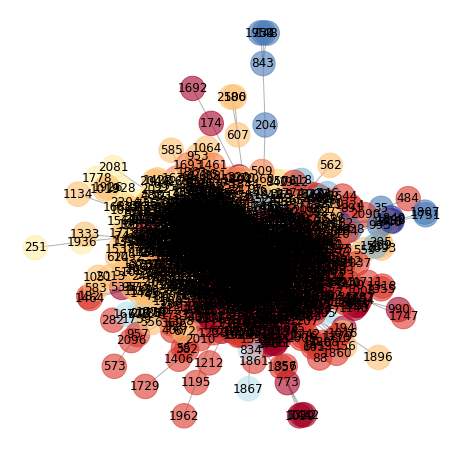

In [16]:
pos = nx.spring_layout(G_largestConnectedComponent)
plt.figure(figsize=(8, 8))
plt.axis("off")
nx.draw_networkx_nodes(G_largestConnectedComponent, pos, node_size=600, alpha=0.6, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G_largestConnectedComponent, pos, alpha=0.3)
nx.draw_networkx_labels(G_largestConnectedComponent, pos)
plt.show(G_largestConnectedComponent)

#### 3.2 Extract the communities based on similarity (e.g., preferred artist(s), music type)

In [27]:
G_preferredArtist = nx.Graph()
G_preferredArtist.add_weighted_edges_from(db_user_artists.values)

print("Number of nodes in the graph: ", len(G_preferredArtist.nodes()))
print("Number of edges in the graph: ", len(G_preferredArtist.edges()))

Number of nodes in the graph:  16549
Number of edges in the graph:  83131


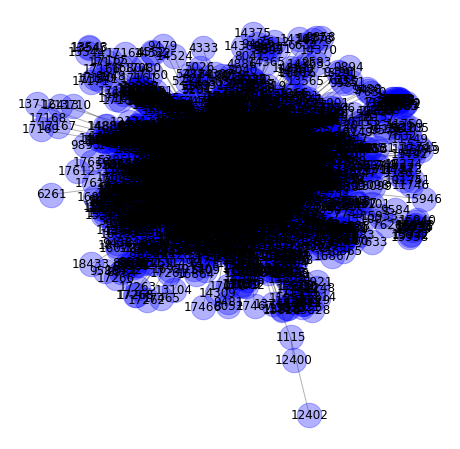

In [84]:
pos = nx.spring_layout(G_preferredArtist)
plt.figure(figsize=(8, 8))
plt.axis("off")
nx.draw_networkx_nodes(G_preferredArtist, pos, node_size=600, node_color="blue", alpha=0.3)
nx.draw_networkx_edges(G_preferredArtist, pos, alpha=0.3)
nx.draw_networkx_labels(G_preferredArtist, pos)
plt.show(G_preferredArtist)

In [28]:
partition = community.best_partition(G_preferredArtist)
print("Number of communities: ", len(set(partition.values())))
print("Louvain modularity: ", community.modularity(partition, G_preferredArtist))
print("Louvain communities: ", partition)

Number of communities:  24
Louvain modularity:  0.4907318499947017
Louvain communities:  {1430: 0, 1097: 1, 822: 2, 267: 2, 1335: 3, 13910: 4, 815: 5, 325: 6, 1147: 4, 12657: 4, 2093: 7, 2893: 7, 656: 8, 5156: 5, 80: 0, 2215: 0, 1273: 5, 441: 8, 1340: 2, 2637: 2, 1947: 4, 2542: 2, 1047: 6, 11991: 6, 1484: 4, 11864: 2, 603: 3, 1700: 3, 1501: 0, 8277: 0, 1530: 7, 245: 2, 451: 6, 292: 7, 50: 4, 1048: 4, 1028: 9, 1246: 10, 1509: 11, 1673: 7, 576: 4, 3875: 4, 335: 12, 283: 13, 1078: 5, 9819: 5, 503: 5, 646: 13, 1036: 7, 11915: 7, 1915: 12, 17578: 12, 720: 4, 975: 11, 1525: 9, 681: 6, 780: 6, 167: 8, 329: 14, 220: 4, 409: 13, 6590: 13, 57: 0, 1196: 2, 1615: 4, 760: 7, 2983: 11, 2064: 8, 10132: 9, 809: 13, 1452: 13, 814: 6, 321: 6, 217: 4, 1206: 7, 541: 7, 1249: 5, 1832: 5, 1244: 7, 1993: 15, 56: 4, 354: 13, 349: 13, 1489: 7, 13: 13, 298: 5, 1236: 5, 547: 7, 1192: 5, 707: 5, 1577: 13, 915: 13, 1432: 6, 14522: 6, 1289: 4, 121: 6, 1706: 12, 2655: 0, 1754: 5, 1639: 7, 1660: 7, 15918: 2, 5299: 0,

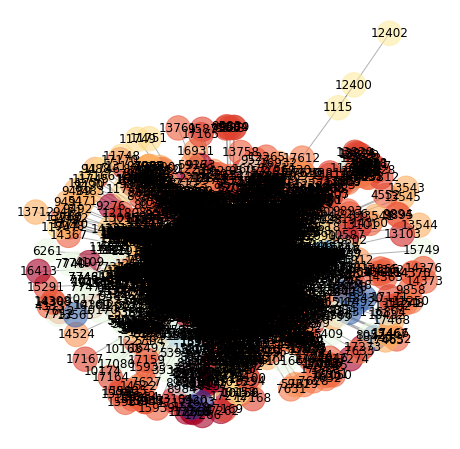

In [29]:
pos = nx.spring_layout(G_preferredArtist)
plt.figure(figsize=(8, 8))
plt.axis("off")
nx.draw_networkx_nodes(G_preferredArtist, pos, node_size=600, alpha=0.6, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G_preferredArtist, pos, alpha=0.3)
nx.draw_networkx_labels(G_preferredArtist, pos)
plt.show(G_preferredArtist)

## Filtrando il db mantenendo solo l'artista preferito

Number of nodes in the graph:  2345
Number of edges in the graph:  1927


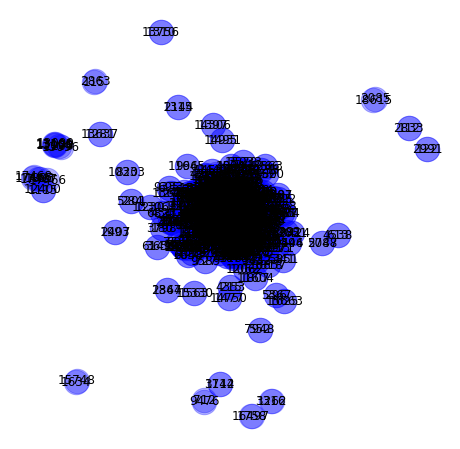

In [50]:
mask = db_user_artists.groupby(['userID'])['weight'].transform(max) == db_user_artists['weight']
db_user_preferredArtist = db_user_artists[mask]
#del db_user_preferredArtist["weight"]

G_preferredArtist = nx.Graph()
#G_preferredArtist.add_edges_from(db_user_preferredArtist.values)
G_preferredArtist.add_weighted_edges_from(db_user_preferredArtist.values)

print("Number of nodes in the graph: ", len(G_preferredArtist.nodes()))
print("Number of edges in the graph: ", len(G_preferredArtist.edges()))

pos = nx.spring_layout(G_preferredArtist)
plt.figure(figsize=(8, 8))
plt.axis("off")
nx.draw_networkx_nodes(G_preferredArtist, pos, node_size=600, node_color="blue", alpha=0.3)
nx.draw_networkx_edges(G_preferredArtist, pos, alpha=0.3)
nx.draw_networkx_labels(G_preferredArtist, pos)
plt.show(G_preferredArtist)

In [51]:
partition = community.best_partition(G_preferredArtist)
print("Number of communities: ", len(set(partition.values())))
print("Louvain modularity: ", community.modularity(partition, G_preferredArtist))
print("Louvain communities: ", partition)

Number of communities:  476
Louvain modularity:  0.9616644615300014
Louvain communities:  {814: 0, 321: 0, 1432: 1, 14522: 1, 854: 2, 8277: 2, 56: 3, 1513: 3, 1287: 4, 1521: 4, 140: 5, 3248: 5, 25: 6, 455: 6, 428: 7, 51: 7, 583: 8, 492: 8, 550: 9, 707: 9, 1696: 10, 227: 10, 1113: 11, 288: 11, 1161: 12, 12795: 12, 32: 13, 851: 13, 884: 14, 295: 14, 719: 15, 2342: 15, 1898: 16, 461: 16, 1253: 17, 289: 17, 1958: 18, 13085: 18, 392: 19, 679: 19, 313: 20, 917: 20, 889: 3, 8403: 3, 1771: 17, 1429: 21, 1114: 21, 998: 22, 333: 22, 1463: 23, 14646: 23, 2100: 24, 4271: 24, 1089: 1, 72: 1, 341: 25, 5851: 25, 708: 1, 1202: 1, 1544: 26, 378: 26, 809: 27, 89: 27, 1810: 11, 576: 7, 1076: 28, 610: 28, 842: 29, 1943: 29, 900: 30, 10925: 30, 1784: 31, 6600: 31, 768: 32, 344: 33, 1222: 6, 526: 34, 816: 34, 961: 35, 898: 35, 1345: 36, 13999: 36, 121: 0, 1707: 10, 911: 17, 196: 10, 1411: 21, 190: 21, 27: 1, 423: 1, 1555: 37, 257: 37, 938: 7, 680: 7, 1712: 10, 163: 10, 203: 38, 503: 39, 164: 7, 1643: 7, 202

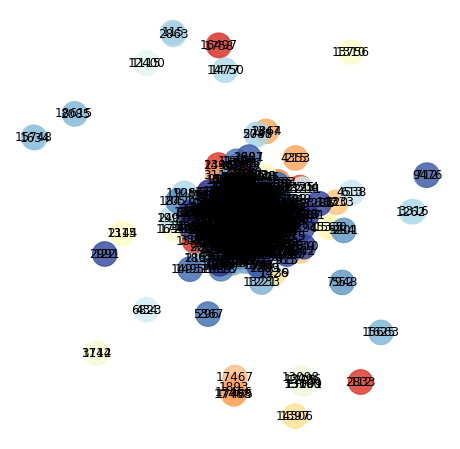

In [52]:
pos = nx.spring_layout(G_preferredArtist)
plt.figure(figsize=(8, 8))
plt.axis("off")
nx.draw_networkx_nodes(G_preferredArtist, pos, node_size=600, alpha=0.6, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G_preferredArtist, pos, alpha=0.3)
nx.draw_networkx_labels(G_preferredArtist, pos)
plt.show(G_preferredArtist)

#### 4. Compute the global clustering coefficient of the:
- global network 
- the communities 
- (OPTIONAL) compare them and discuss the result

In [35]:
print("Global clustering coefficient of the global network: ", nx.transitivity(G_friends))
print("Global clustering coefficient of the community based on similarity - preferred artist network: ", nx.transitivity(G_preferredArtist))

Global clustering coefficient of the global network:  0.13375631759143525
Global clustering coefficient of the community based on similarity - preferred artist network:  0.0003864236491273266


#### 5. Compute the local clustering coefficients, and extract the average, within: 
- the global network 
- the communities 
- (OPTIONAL) compare them and discuss the result

In [37]:
clust = nx.clustering(G_friends)
sorted(((v,k) for k,v in clust.items()), reverse=True)
print("Average local clustering coefficient of the global network:", np.mean(np.array(list(clust.values()))))

clust = nx.clustering(G_preferredArtist)
sorted(((v,k) for k,v in clust.items()), reverse=True)
print("Average local clustering coefficient of the community based on similarity - preferred artist network:", np.mean(np.array(list(clust.values()))))

Average local clustering coefficient of the global network: 0.18654479547922218
Average local clustering coefficient of the community based on similarity - preferred artist network: 0.000489512270200665


#### 6. Compute the similarity between users according to: 
- Their common friends 
- The artist(s) listened 
- Music type 
- (OPTIONAL) The artist(s) preferred by their friends 
- (OPTIONAL) The type of music listened by their friends

2345


In [49]:
# compute jaccard similarity among all nodes
pair_similarity=[]
pairs = nx.jaccard_coefficient(G_preferredArtist)
for u, v, p in pairs:
    pair_similarity.append((u,v,p))

print(pair_similarity)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Task4: Binary classifier for inferring users's artists interest.
Build a binary classifier which is able to infer, given a tuple <user-artist>, if the user would be interested in the artist or not. In order to build the classifier consider a set of features (at least 10 features are expected) which characterize a tuple user-artist. Some examples of features are listed below, given a tuple of user U and artist A. 
- Feature 1: popularity of artist A. 
- Feature 2: popularity of the N clusters C(i), which artist A belongs to. 
- Feature 3: number of artists listened to by user U, belonging to the same clusters C(i) of artist A.
- Feature 4: number of friends of user U, which listened to artist A. 
- Feature 5: boolean representing if artist A similarity to the user's most listened artists is lower than a certain distance threshold d .
- Feature 6: the communities computed in Task 3.

Analysing datasets in way to see if are well formed and checking for null values

In [ ]:
print("Missing values: " + str(wineRed_df.isnull().sum()))
